<a href="https://colab.research.google.com/github/MargaridaVitolo/Educ360/blob/main/Pandas_Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title LER DADOS

import pandas as pd

origem = 'https://raw.githubusercontent.com/ivansanchespetrucci/python-pandas/refs/heads/main/base_automoveis.csv'

dados = pd.read_csv(origem)

dados

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
1,Volkswagen,Polo,2010,5000.00
2,Chevrolet,Corsa,2017,9944.40
3,Toyota,Yaris,2012,5000.00
4,Chevrolet,Cruze,2018,57020.67
...,...,...,...,...
95,Ford,Fiesta,2007,5000.00
96,Honda,HR-V,2012,5000.00
97,Volkswagen,Jetta,2019,32496.56
98,Chevrolet,Corsa,2022,56143.58


In [ ]:
dados.head()    # apresenta os 5 primeiros
dados.head(15)  # apresenta os 15 primeiros
dados.tail()    # apresenta os 5 últimos
dados.tail(10)  # apresenta os 10 últimos

# pode executar somente uma linha, selecionando somente a linha desejada

,montadora,modelo,ano_fabricacao,valor_mercado
90,Toyota,Hilux,2022,42740.59
91,Toyota,Yaris,2018,7154.62
92,Ford,Focus,2022,35918.10
93,Ford,Fiesta,2018,34799.42
94,Volkswagen,Polo,2014,13507.98
95,Ford,Fiesta,2007,5000.00
96,Honda,HR-V,2012,5000.00
97,Volkswagen,Jetta,2019,32496.56
98,Chevrolet,Corsa,2022,56143.58
99,Toyota,RAV4,2009,7970.51


In [ ]:
# @title TIPOS DADOS

type(dados)

pandas.core.frame.DataFrame

In [ ]:
dados.shape


(100, 4)

In [ ]:
dados.columns

Index(['montadora', 'modelo', 'ano_fabricacao', 'valor_mercado'], dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   montadora       100 non-null    object 
 1   modelo          100 non-null    object 
 2   ano_fabricacao  100 non-null    int64  
 3   valor_mercado   97 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [ ]:
# @title EXPLORAR DADOS

dados['montadora']

dados[['montadora', 'modelo']]


,montadora,modelo
0,Ford,Focus
1,Volkswagen,Polo
2,Chevrolet,Corsa
3,Toyota,Yaris
4,Chevrolet,Cruze
...,...,...
95,Ford,Fiesta
96,Honda,HR-V
97,Volkswagen,Jetta
98,Chevrolet,Corsa


In [ ]:
# @title ANÁLISE DADOS (EDA)

dados['valor_mercado'].mean()

np.float64(19798.34556701031)

In [ ]:
dados.groupby('montadora').mean(numeric_only=True)

dados.groupby('montadora')['valor_mercado'].mean()

,valor_mercado
montadora,
Chevrolet,17031.477895
Ford,20590.348125
Honda,19383.115714
Toyota,19886.930870
Volkswagen,21545.313600


In [ ]:
dados.groupby('montadora')[['valor_mercado']].mean().sort_values('valor_mercado',ascending=False)

,valor_mercado
montadora,
Volkswagen,21545.313600
Ford,20590.348125
Toyota,19886.930870
Honda,19383.115714
Chevrolet,17031.477895


<Axes: ylabel='montadora'>

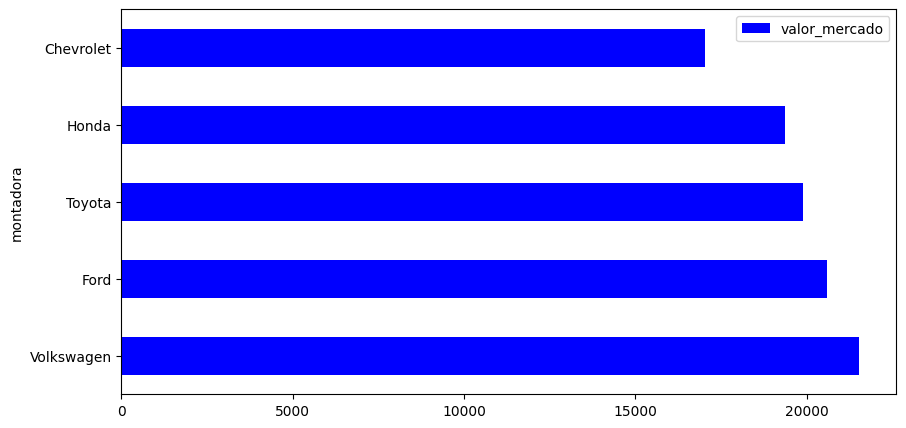

In [ ]:
dados_montadora = dados.groupby('montadora')[['valor_mercado']].mean().sort_values('valor_mercado',ascending=False)

dados_montadora.plot(kind='barh', figsize=(10,5), color='blue')

In [ ]:
dados.montadora.value_counts()

,count
montadora,
Volkswagen,25
Toyota,23
Chevrolet,20
Ford,16
Honda,16


In [ ]:
dados.montadora.value_counts(normalize=True)

,proportion
montadora,
Volkswagen,0.25
Toyota,0.23
Chevrolet,0.20
Ford,0.16
Honda,0.16


In [ ]:
# @title VALORES NULOS

dados.isnull().sum()

,0
montadora,0
modelo,0
ano_fabricacao,0
valor_mercado,3


In [ ]:
dados = dados.fillna(0)

In [ ]:
# @title APLICAR FILTROS

dados.montadora.unique()

array(['Ford', 'Volkswagen', 'Chevrolet', 'Toyota', 'Honda'], dtype=object)

In [ ]:
filtro = ['Toyota', 'Honda', 'Ford']

In [ ]:
dados.query('montadora == "Ford"')

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
12,Ford,Ka,2021,36823.04
15,Ford,Focus,2008,5000.00
26,Ford,Ka,2017,24748.14
38,Ford,Ka,2010,5000.00
40,Ford,Fusion,2009,8246.02
45,Ford,Fusion,2006,5000.00
46,Ford,Ka,2019,29725.86
54,Ford,EcoSport,2013,5000.00
65,Ford,Fusion,2011,5000.00


In [ ]:
dados.query('@filtro in montadora')

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
3,Toyota,Yaris,2012,5000.00
6,Honda,WR-V,2014,5000.00
9,Honda,WR-V,2010,5000.00
12,Ford,Ka,2021,36823.04
14,Honda,HR-V,2015,7386.78
15,Ford,Focus,2008,5000.00
17,Toyota,Yaris,2016,11074.95
20,Honda,Fit,2015,5000.00
23,Honda,WR-V,2023,0.00


In [ ]:
dados.query('@filtro not in montadora')

,montadora,modelo,ano_fabricacao,valor_mercado
1,Volkswagen,Polo,2010,5000.00
2,Chevrolet,Corsa,2017,9944.40
4,Chevrolet,Cruze,2018,57020.67
5,Chevrolet,S10,2010,0.00
7,Chevrolet,Onix,2022,26414.68
8,Chevrolet,S10,2006,5000.00
10,Chevrolet,Prisma,2016,21412.44
11,Volkswagen,Fox,2007,5000.00
13,Chevrolet,Corsa,2016,26774.33
16,Volkswagen,Polo,2007,5000.00


In [ ]:
dados_pesq = dados.query('@filtro in montadora')
dados_pesq

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
3,Toyota,Yaris,2012,5000.00
6,Honda,WR-V,2014,5000.00
9,Honda,WR-V,2010,5000.00
12,Ford,Ka,2021,36823.04
14,Honda,HR-V,2015,7386.78
15,Ford,Focus,2008,5000.00
17,Toyota,Yaris,2016,11074.95
20,Honda,Fit,2015,5000.00
23,Honda,WR-V,2023,0.00


<Axes: ylabel='montadora'>

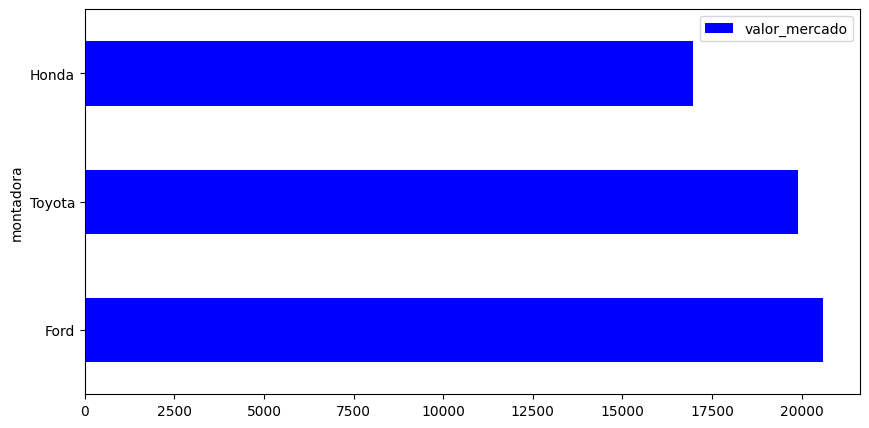

In [ ]:
dados_montadora = dados_pesq.groupby('montadora')[['valor_mercado']].mean().sort_values('valor_mercado',ascending=False)

dados_montadora.plot(kind='barh', figsize=(10,5), color='blue')

In [ ]:
dados_pesq.montadora.value_counts(normalize=True)

,proportion
montadora,
Toyota,0.418182
Ford,0.290909
Honda,0.290909


In [ ]:
dados_filtro_ano = dados_pesq['ano_fabricacao'] >= 2021
dados_pesq[dados_filtro_ano]

In [ ]:
dados_filtro_valor = dados_pesq['valor_mercado'] >= 40000
dados_pesq[dados_filtro_valor]

In [ ]:
dados_filtro_final = (dados_filtro_ano) & (dados_filtro_valor)
dados_pesq[dados_filtro_final]

In [ ]:
selecao = dados_pesq.query('ano_fabricacao > 2020 and valor_mercado >= 30000')
selecao